# ININO216A: IA PARA CIENCIA DE DATOS

## Contenido

1. Cargar librerías
1. Leer archivo y procesar datos
1. ML methods

## 1. Cargar librerías

In [10]:
import warnings
warnings.filterwarnings("ignore")
import math
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

In [11]:
# Sklearn processing
from sklearn import preprocessing # to normalize data
from sklearn.model_selection import train_test_split
import sklearn.decomposition as sk # to compute PCA

# sklearn for ML
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## 2. Leer archivo y procesar datos

### 2.1 Leer archivo

In [3]:
def leeDatos():

    dataSet = pd.read_csv("covid.csv", header=0, index_col=0)
    dataSet.index = pd.to_datetime(dataSet.index,format='%d/%m/%y',errors='ignore')

    return dataSet

In [4]:
# get data
datos = leeDatos()
print(datos)

            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   
...                    ...              ...                  ...       ...   
2023-06-20               3               27                    2         3   
2023-06-21               2               24                    6         2   
2023-06-22               5               19                    2         0   
2023-06-23               0                6                    3         7   
2023-06-24               0                0                    0

In [5]:
def describeData(dataSet=0):
    """
    Data descriptive statistics
    """
    pd.set_option.precision = 4

    print(dataSet.head())
    print("\n")
    print(dataSet.info())
    print("\n")
    print(dataSet.describe())
    print("\n")
    print(dataSet.nunique())
    print("\n")

In [6]:
# View data information
describeData(datos)

            AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE  \
date                                                                         
2020-02-26               0                0                    0         0   
2020-02-27               0                0                    0         0   
2020-02-28               0                0                    0         0   
2020-02-29               0                0                    0         0   
2020-03-01               0                0                    0         0   

            CHIAPAS  CHIHUAHUA  DISTRITO FEDERAL  COAHUILA  COLIMA  DURANGO  \
date                                                                          
2020-02-26        0          0                 0         0       0        0   
2020-02-27        0          0                 2         0       0        0   
2020-02-28        0          0                 0         1       0        0   
2020-02-29        1          0                 0         0

### 2.2 Preprocesamiento

In [13]:
def graficaDatos(dataSet=0):

    plt.figure()
    for i in range(len(dataSet.columns)):
        plt.plot(dataSet.iloc[:,i],label=dataSet.columns[i])
    plt.grid(color='b',linestyle='dashed')
    plt.gcf().autofmt_xdate()
    plt.title('COVID-19', fontweight='bold')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor')
    plt.legend(loc='upper left')
    plt.show()

def procesarDatos(dataSet=0):
    """
    Normalize and smooth data
    """
    dataSet = dataSet.fillna(method='ffill')

    # fit the scaler
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(dataSet)

    # Transform the data using the fitted scaler
    np_dataSet = scaler.transform(dataSet)

    # Convert the numpy array back to a DataFrame
    dataSet = pd.DataFrame(np_dataSet, columns=dataSet.columns, index=dataSet.index)

    return dataSet



In [14]:
# select states
estados = ['Nacional', 'MEXICO', 'DISTRITO FEDERAL', 'GUANAJUATO', 'JALISCO', 'MORELOS','PUEBLA','QUERETARO']

# get selected data
misDatos = datos[estados]
print(misDatos)

            Nacional  MEXICO  DISTRITO FEDERAL  GUANAJUATO  JALISCO  MORELOS  \
date                                                                           
2020-02-26         0       0                 0           0        0        0   
2020-02-27         4       1                 2           0        0        0   
2020-02-28         2       1                 0           0        0        0   
2020-02-29         2       1                 0           0        0        0   
2020-03-01         2       0                 0           1        0        0   
...              ...     ...               ...         ...      ...      ...   
2023-06-20       444      30                74          17        8        1   
2023-06-21       405      28                77          13       10        2   
2023-06-22       388      39                79          10        6        2   
2023-06-23       213      15                37           5        7        0   
2023-06-24        15       1            

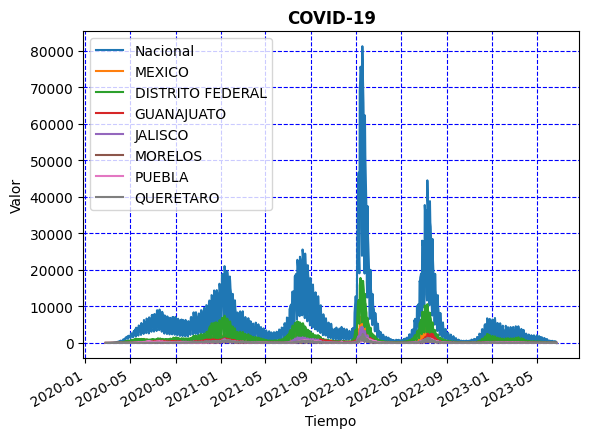

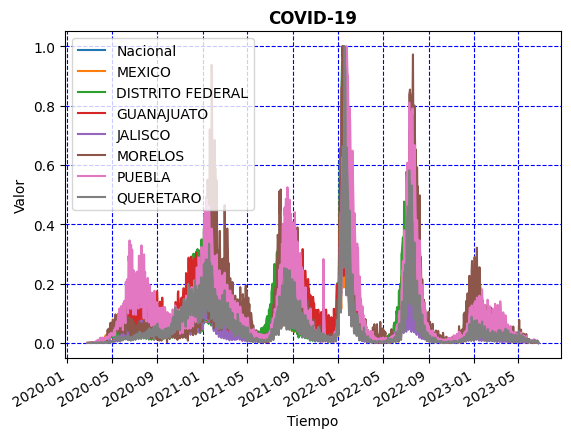

In [15]:
graficaDatos(misDatos)

datosProcesados = procesarDatos(misDatos)

graficaDatos(datosProcesados)

### 2.3 Correlation analysis

In [16]:
def computeCorr(dataSet=0):
    """
    Compute CORRELATION
    """

    # correlation analysis
    correlation=dataSet.corr(method = 'pearson')
    print("==========================================================")
    print("                 CORRELATION ANALYSIS")
    print("----------------------------------------------------------")
    print(correlation)
    print("\n")

    plt.figure()
    sns.heatmap(correlation, annot=True)
    plt.title('CORRELATION MATRIX', fontweight='bold')
    plt.show()

                 CORRELATION ANALYSIS
----------------------------------------------------------
                  Nacional    MEXICO  DISTRITO FEDERAL  GUANAJUATO   JALISCO  \
Nacional          1.000000  0.981782          0.967602    0.921567  0.951693   
MEXICO            0.981782  1.000000          0.965431    0.892375  0.930876   
DISTRITO FEDERAL  0.967602  0.965431          1.000000    0.874854  0.895145   
GUANAJUATO        0.921567  0.892375          0.874854    1.000000  0.836382   
JALISCO           0.951693  0.930876          0.895145    0.836382  1.000000   
MORELOS           0.833116  0.829820          0.822637    0.846371  0.762118   
PUEBLA            0.855105  0.849786          0.804302    0.888353  0.783835   
QUERETARO         0.948653  0.936622          0.931995    0.921206  0.884305   

                   MORELOS    PUEBLA  QUERETARO  
Nacional          0.833116  0.855105   0.948653  
MEXICO            0.829820  0.849786   0.936622  
DISTRITO FEDERAL  0.822637  0.80

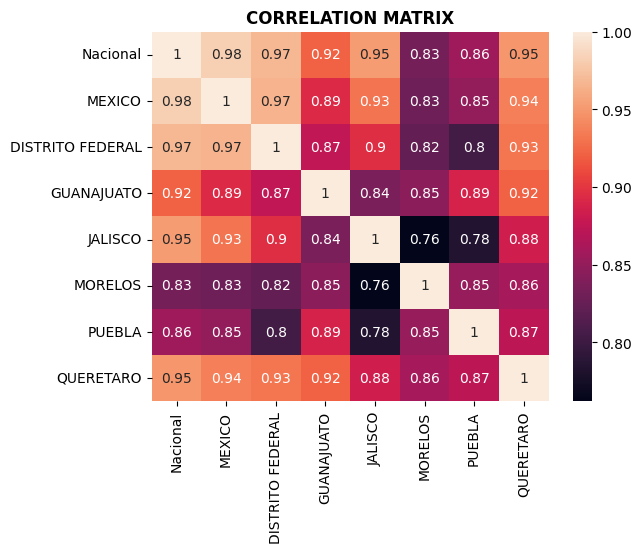

In [17]:
# compute correlation
computeCorr(datosProcesados)

### 2.4 Split Data

In [18]:

# --------------------
# split data
def splitDataSet(dataSet=0, test_size=.2, randSplit=True):
    """
    Split data in train and test sets
    """

    train, test = train_test_split(dataSet, test_size=test_size, shuffle=randSplit)

    return [train, test]

Train set
            Nacional    MEXICO  DISTRITO FEDERAL  GUANAJUATO  JALISCO  \
date                                                                    
2020-02-26  0.000000  0.000000          0.000000    0.000000      0.0   
2020-02-27  0.000049  0.000124          0.000112    0.000000      0.0   
2020-02-28  0.000025  0.000124          0.000000    0.000000      0.0   
2020-02-29  0.000025  0.000124          0.000000    0.000000      0.0   
2020-03-01  0.000025  0.000000          0.000000    0.000306      0.0   

            MORELOS  PUEBLA  QUERETARO  
date                                    
2020-02-26      0.0     0.0        0.0  
2020-02-27      0.0     0.0        0.0  
2020-02-28      0.0     0.0        0.0  
2020-02-29      0.0     0.0        0.0  
2020-03-01      0.0     0.0        0.0  

trainSet shape:  (911, 8)



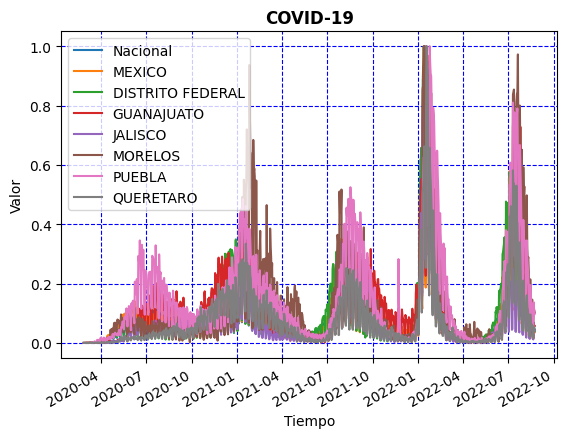

Test set
            Nacional    MEXICO  DISTRITO FEDERAL  GUANAJUATO   JALISCO  \
date                                                                     
2022-08-25  0.040356  0.033458          0.039928    0.042508  0.032360   
2022-08-26  0.036235  0.026493          0.033414    0.037615  0.032587   
2022-08-27  0.014022  0.011194          0.017016    0.011927  0.009731   
2022-08-28  0.013628  0.007836          0.011905    0.018960  0.010636   
2022-08-29  0.047108  0.039801          0.044196    0.036697  0.040281   

             MORELOS    PUEBLA  QUERETARO  
date                                       
2022-08-25  0.084211  0.068167   0.026829  
2022-08-26  0.065789  0.071476   0.021545  
2022-08-27  0.027632  0.029782   0.006504  
2022-08-28  0.026316  0.025149   0.006504  
2022-08-29  0.067105  0.066843   0.034959  

testSet shape:  (304, 8)



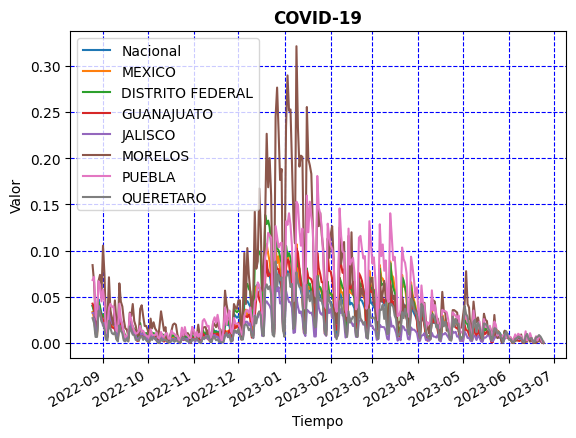

In [20]:
# Split data into training and test sets
ts_size = .25
[trainSet, testSet] = splitDataSet(datosProcesados, test_size=ts_size, randSplit=False)
print("Train set")
print(trainSet.head())
print()
print('trainSet shape: ', trainSet.shape)
print()
graficaDatos(trainSet)

print("Test set")
print(testSet.head())
print()
print('testSet shape: ', testSet.shape)
print()
graficaDatos(testSet)

## 3. ML methods

In [26]:
def metodosML(dataSet=0, dataSet2=0):

    methodsUsed=['DT', 'RF']
    performanceHeaders=['RSS','SSR','TSS','R-Square','Adj. R-Square']
    comperrHeaders=['MSE','RMSE', 'MAPE']
    errorHeaders=['Mean','Median', 'SD','25%','50%','75%','Min','Max','Range']
    modPerformance = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
    modPerformance.index.name = "Model Performance"
    comperr = pd.DataFrame(index=methodsUsed, columns=comperrHeaders)
    comperr.index.name = "Error Metrics"
    regError = pd.DataFrame(index=methodsUsed, columns=errorHeaders)
    regError.index.name = "Relative Error"
    modPerformance3 = pd.DataFrame(index=methodsUsed, columns=performanceHeaders)
    modPerformance3.index.name = "Model Performance"
    comperr3 = pd.DataFrame(index=methodsUsed, columns=comperrHeaders)
    comperr3.index.name = "Error Metrics"
    regError3 = pd.DataFrame(index=methodsUsed, columns=errorHeaders)
    regError3.index.name = "Relative Error"

    trainModel = pd.DataFrame()
    testModel = pd.DataFrame()
    yModel = pd.DataFrame()
    yModel3 = pd.DataFrame()
    trainModel['Raw Data'] = dataSet.iloc[:,0]
    testModel['Raw Data'] = dataSet2.iloc[:,0]
    sizeData=len(dataSet.columns)-1

  # Decision Tree regression ********
    print("Decision Tree Regression")
    regr = DecisionTreeRegressor(max_depth=4)
    regr.fit(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1))
    
    # train data
    trainModel['Fitted DT'] = regr.predict(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData))
    yModel['Fitted DT'] = trainModel['Fitted DT']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'DT', dataSet, 0, regError, comperr, modPerformance, 0)
    
    # test data
    testModel['Fitted DT'] = regr.predict(dataSet2.iloc[:,1:].to_numpy().reshape(len(dataSet2),sizeData))
    yModel3['Fitted DT'] = testModel['Fitted DT']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'DT', dataSet2, 0, regError3, comperr3, modPerformance3, 0)
    print("\n")

    # Random Forest regression ********
    print("Random Forest Regression")
    regr = RandomForestRegressor(n_estimators=4)
    regr.fit(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData), dataSet.iloc[:,0].to_numpy().reshape(len(dataSet),1))
    
    # train data
    trainModel['Fitted RT'] = regr.predict(dataSet.iloc[:,1:].to_numpy().reshape(len(dataSet),sizeData))
    yModel['Fitted RT'] = trainModel['Fitted RT']
    # compute residuals, relative error and model performance
    yModel, regError, comperr, modPerformance = compareMethod(yModel, 'RT', dataSet, 0, regError, comperr, modPerformance, 1)
    
    # test data
    testModel['Fitted RT'] = regr.predict(dataSet2.iloc[:,1:].to_numpy().reshape(len(dataSet2),sizeData))
    yModel3['Fitted RT'] = testModel['Fitted RT']
    yModel3, regError3, comperr3, modPerformance3 = compareMethod(yModel3, 'RT', dataSet2, 0, regError3, comperr3, modPerformance3, 1)
    print(f"Number of trees (n_estimators): {regr.n_estimators}")
    print(f"Max depth of trees (max_depth): {regr.max_depth}")
    print("\n")

    print("=======================================================================")
    print("                      MODEL PERFORMANCE COMPARISON")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(modPerformance.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print("-----------------------------------------------------------------------")
    print(modPerformance3.T)
    print("=======================================================================")
    print("                      ERROR METRICS")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(comperr.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print(comperr3.T)
    print("=======================================================================")
    print("                      MAPE (RELATIVE ERROR) COMPARISON")
    print("-----------------------------------------------------------------------")
    print("                      Training")
    print("-----------------------------------------------------------------------")
    print(regError.T)
    print("-----------------------------------------------------------------------")
    print("                      Testing")
    print("-----------------------------------------------------------------------")
    print(regError3.T)
    print("\n")


    return [trainModel, testModel]

In [27]:
# --------------------
# create performance tables
def compareMethod(yModel, method, dataSet, y, regError, comperr, modPerformance, i):
    name_fit = 'Fitted ' + method
    name_res = 'Residuals ' + method
    name_err = 'Rel Error_' + method

    size = len(yModel)

    # compute residuals and relative error
    yModel[name_res] = dataSet.iloc[:,y] - yModel[name_fit]
    yModel[name_err] = (1-(yModel[name_fit]/dataSet.iloc[:,y])).abs()
    regError.iloc[i,0] = yModel[name_err].mean(axis=0)
    regError.iloc[i,1] = yModel[name_err].median(axis=0)
    regError.iloc[i,2] = yModel[name_err].std(axis=0)
    regError.iloc[i,3] = yModel[name_err].quantile(q=.25)
    regError.iloc[i,4] = yModel[name_err].quantile(q=.5)
    regError.iloc[i,5] = yModel[name_err].quantile(q=.75)
    regError.iloc[i,6] = yModel[name_err].min()
    regError.iloc[i,7] = yModel[name_err].max()
    regError.iloc[i,8] = regError.iloc[i,7] - regError.iloc[i,6]

    # Models Performance
    modPerformance.iloc[i,0] = (yModel[name_res]**2).sum()
    modPerformance.iloc[i,1] = ((yModel[name_fit]-dataSet.iloc[:,y].mean(axis=0))**2).sum()
    modPerformance.iloc[i,2] = modPerformance.iloc[i,0]+modPerformance.iloc[i,1]
    modPerformance.iloc[i,3] = 1-modPerformance.iloc[i,0]/modPerformance.iloc[i,2]
    modPerformance.iloc[i,4] = 1-(1-modPerformance.iloc[i,3])*((size-1)/(size-4-1))

    # error metrics
    comperr.iloc[i,0] = modPerformance.iloc[i,0]/size
    comperr.iloc[i,1] = comperr.iloc[i,0]**(1/2)
    comperr.iloc[i,2] = regError.iloc[i,0]

    return (yModel, regError, comperr, modPerformance)

Decision Tree Regression


Random Forest Regression
Number of trees (n_estimators): 4
Max depth of trees (max_depth): None


                      MODEL PERFORMANCE COMPARISON
-----------------------------------------------------------------------
                      Training
-----------------------------------------------------------------------
Model Performance         DT         RF
RSS                 0.342831   0.071455
SSR                14.523339  14.616999
TSS                14.866171  14.688454
R-Square            0.976939   0.995135
Adj. R-Square       0.976837   0.995114
-----------------------------------------------------------------------
                      Testing
-----------------------------------------------------------------------
Model Performance        DT        RF
RSS                0.040147  0.005484
SSR                0.192047   0.14987
TSS                0.232194  0.155355
R-Square           0.827097  0.964699
Adj. R-Square      0.824784  0.964227
       

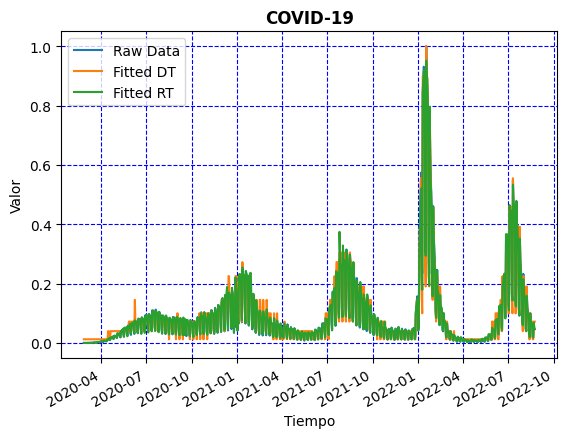



Test predictions vs Raw Data


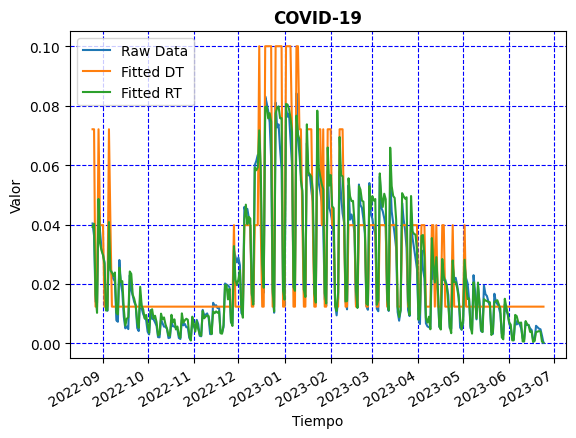

In [28]:
[trainModel, testModel] = metodosML(trainSet, testSet)

# plot results
print("\n")
print("Train predictions vs Raw Data")
graficaDatos(trainModel)
print("\n")
print("Test predictions vs Raw Data")
graficaDatos(testModel)